# Inferencia sobre recursos de salud y características sociodemográficas

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Importación de los datos**

In [31]:
url='https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv'
df=pd.read_csv(url,sep=',')

**Análisis exploratorio**

In [33]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [37]:
print('La base de datos cuenta con', df.shape[0], 'observaciones y ',df.shape[1],' variables, las cuales se enlistan a continuación:',df.columns.to_list())

La base de datos cuenta con 3140 observaciones y  108  variables, las cuales se enlistan a continuación: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some c

Dada la gran cantidad de variables médicas, se decide considerar como variable target el porcentaje de población con Obesidad y como varibales explicativas todas las referentes a características sociodemográficas totalizando 74 features.

Además se observa que el nombre de la variable '19-Oct' debería ser '10-19' porque alude a un rango etareo, así que se corrige a continuación.

In [51]:
df.rename(columns={'19-Oct':'10-19'},inplace=True)

In [52]:
X=df.loc[:,'TOT_POP':'ICU Beds_x']
y=df['Obesity_number']

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 74 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   TOT_POP                                                                        3140 non-null   int64  
 1   0-9                                                                            3140 non-null   int64  
 2   0-9 y/o % of total pop                                                         3140 non-null   float64
 3   10-19                                                                          3140 non-null   int64  
 4   10-19 y/o % of total pop                                                       3140 non-null   float64
 5   20-29                                                                          3140 non-null   int64  
 6   20-29 y/o % of total pop

Se procede a separar la muestra entre entrenamiento y prueba.

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1807)

In [56]:
df_train=pd.concat([X_train,y_train], axis=1)

In [57]:
df_train.sample(10)

,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Obesity_number
2321,221091,29060,13.143909,29515,13.349707,31475,14.236219,31393,14.199131,27867,12.604312,28479,12.881121,23587,10.668458,14320,6.476971,5395,2.440172,152909,69.161115,54184,24.507556,1511,0.683429,5931,2.682606,285,0.128906,6271,2.836389,221091,6621,3837,12.7,7.5,5.2,0.9,24.2,25.0,15484,40977,48758,32929,11.2,29.7,35.3,23.8,27687,12.8,18.2,17.7,62204,58673,65735,101127,98058,3069,3.0,62204,118.6,229.5,205.0,80.1,72.3,7.0,6.2,92.234913,45.617361,3.000570,92.930697,101.801948,280.575039,0,65317
232,499942,51841,10.369403,58528,11.706958,60663,12.134008,64748,12.951102,60711,12.143609,68685,13.738594,69886,13.978822,42717,8.544391,22163,4.433114,434068,86.823672,10269,2.054038,10951,2.190454,22794,4.559329,2025,0.405047,19835,3.967460,499942,-3304,10921,9.5,8.8,0.8,1.0,-8.4,-7.4,42831,67183,123081,124873,12.0,18.8,34.4,34.9,48846,9.9,11.7,10.5,81002,78925,83079,262348,255161,7187,2.7,81002,107.6,279.6,243.8,96.2,87.1,7.2,6.2,194.809951,100.059062,4.537224,282.634938,192.080033,742.777710,82,101642
745,10217,1250,12.234511,1233,12.068122,1114,10.903396,1125,11.011060,1194,11.686405,1481,14.495449,1472,14.407360,885,8.662034,463,4.531663,10000,97.876089,32,0.313203,39,0.381717,39,0.381717,1,0.009788,106,1.037487,10217,31,133,11.3,9.9,1.4,-0.1,1.9,1.8,1025,3060,2051,953,14.5,43.2,28.9,13.4,1186,11.8,15.6,14.9,55444,50576,60312,5214,5071,143,2.7,55444,99.5,230.8,212.0,80.3,74.4,6.5,6.1,5.271958,1.290126,0.201534,4.016948,5.073477,13.292114,0,3056
35,51736,5632,10.886037,6258,12.096026,5964,11.527756,5636,10.893768,6726,13.000619,7205,13.926473,7208,13.932272,4858,9.389980,2249,4.347070,47215,91.261404,1855,3.585511,870,1.681614,303,0.585666,57,0.110175,1436,2.775630,51736,-171,597,11.0,13.1,-2.1,0.2,-1.3,-1.1,6526,15181,10238,5280,17.5,40.8,27.5,14.2,10046,19.7,26.8,22.9,41929,37906,45952,23241,22286,955,4.1,41929,84.1,217.1,196.7,77.2,71.2,7.6,6.9,26.853047,5.662744,1.069041,24.185736,19.771972,67.127326,10,15103
1176,67111,6479,9.654155,7261,10.819389,6859,10.220381,6614,9.855314,7700,11.47352

In [58]:
round(df_train.describe())

,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Obesity_number
count,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0,2355.0
mean,104186.0,12751.0,12.0,13367.0,13.0,14571.0,12.0,13968.0,12.0,12898.0,12.0,13583.0,14.0,11864.0,13.0,7180.0,8.0,4004.0,5.0,79433.0,84.0,13883.0,9.0,1372.0,2.0,6344.0,2.0,271.0,0.0,2884.0,2.0,104186.0,635.0,2637.0,11.0,10.0,1.0,1.0,-0.0,1.0,8712.0,18798.0,20056.0,21931.0,14.0,34.0,31.0,21.0,13440.0,15.0,21.0,20.0,52493.0,48330.0,56657.0,51460.0,49452.0,2008.0,4.0,52493.0,89.0,255.0,226.0,88.0,80.0,8.0,7.0,53.0,28.0,2.0,63.0,44.0,167.0,24.0,25174.0
std,353620.0,44191.0,2.0,44629.0,2.0,52738.0,3.0,52082.0,2.0,46264.0,1.0,45226.0,1.0,36414.0,2.0,21294.0,2.0,12641.0,1.0,251190.0,17.0,59687.0,15.0,5811.0,8.0,47465.0,3.0,2424.0,0.0,11724.0,2.0,353620.0,3258.0,7058.0,3.0,3.0,4.0,2.0,12.0,11.0,40615.0,53377.0,64161.0,84041.0,6.0,7.0,5.0,9.0,48419.0,6.0,9.0,9.0,13740.0,13436.0,14146.0,179044.0,171698.0,7474.0,2.0,13740.0,20.0,42.0,31.0,13.0,10.0,1.0,1.0,162.0,90.0,4.0,227.0,139.0,571.0,89.0,78205.0
min,277.0,30.0,3.0,37.0,6.0,28.0,6.0,36.0,7.0,26.0,6.0,39.0,5.0,38.0,3.0,17.0,2.0,18.0,1.0,265.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,277.0,-24009.0,0.0,0.0,0.0,-14.0,-3.0,-62.0,-62.0,4.0,60.0,24.0,28.0,1.0,10.0,6.0,5.0,38.0,3.0,2.0,2.0,25385.0,22961.0,27809.0,214.0,208.0,6.0,1.0,25385.0,44.0,191.0,175.0,65.0,61.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
25%,10880.0,1277.0,11.0,1361.0,12.0,1258.0,11.0,1232.0,11.0,1248.0,11.0,1482.0,13.0,1455.0,12.0,936.0,7.0,531.0,4.0,8933.0,79.0,142.0,1.0,71.0,0.0,57.0,0.0,5.0,0.0,179.0,1.0,10880.0,-78.0,177.0,10.0,9.0,-2.0,0.0,-6.0,-5.0,992

In [68]:
#sns.pairplot(df_train)
#plt.show()

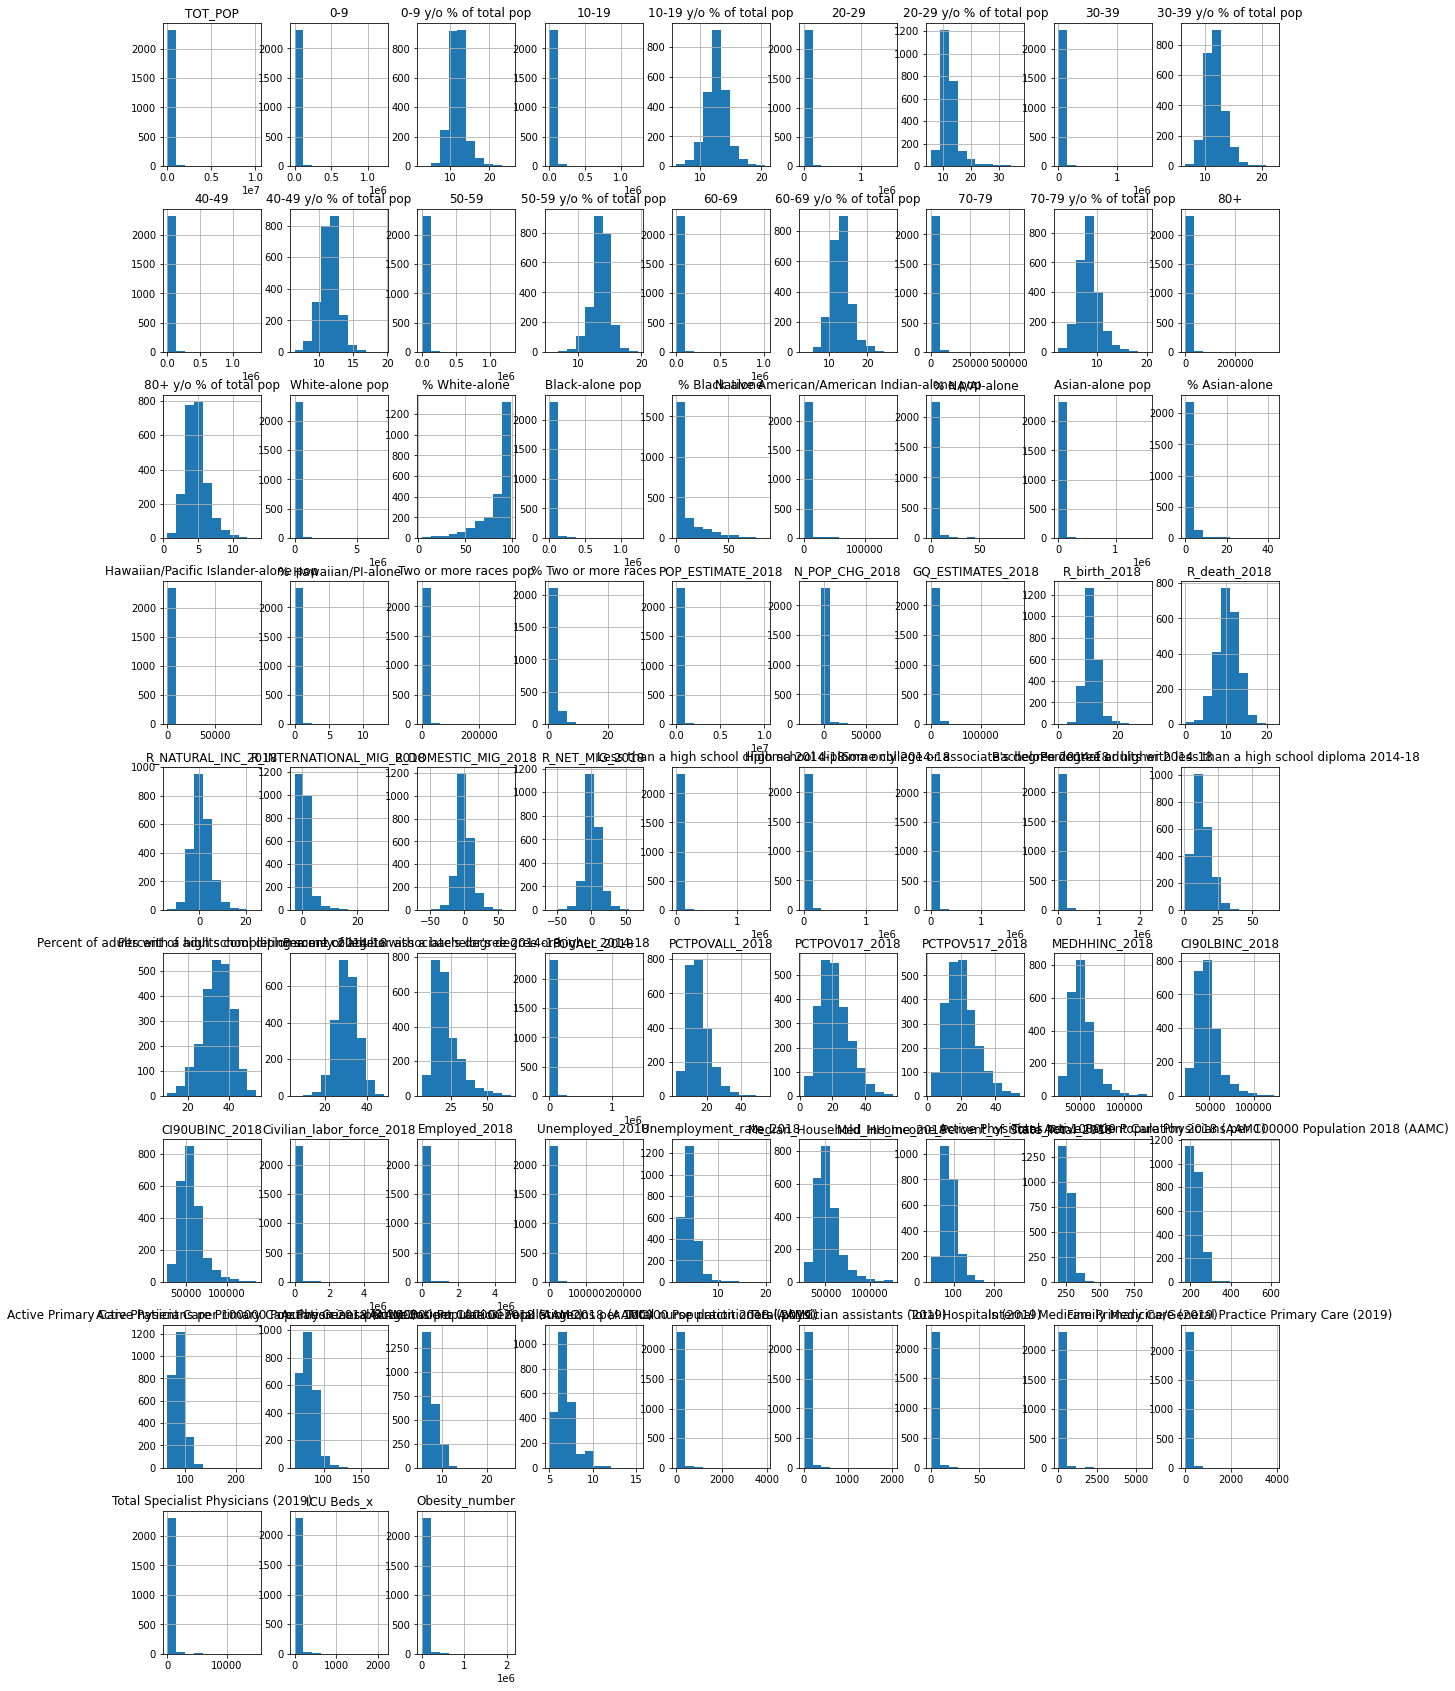

In [64]:
df_train.hist(figsize=(20,30))
plt.show()

In [17]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200
df_corr=df.corr()

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

Mediante pipline realizamos el estacalimento de los datos y su regularización.

In [22]:
ppl=make_pipeline(MinMaxScaler(),Lasso())

Continuar con el pipline y luego realizar el modelo lineal.

In [23]:
scaler=MinMaxScaler()
scaler.fit()
scaler.transform(df_frac)

TypeError: fit() missing 1 required positional argument: 'X'